## Project Overview

### Credit Card Fraud Detection

Credit card fraud is a situation where unauthorized users take people's credit card information and try using them for purchases or removing money from the account. This is also classified under Identity theft.  
Fraud detection projects have been more common nowadays since every business owner will want their customers to be protected at it's maximum level. 

#### Project Approach
- Necessary libraries and data import is perform after which the data description is used to understand it and also check for null values
- The target class which is binary is noticed to have imbalanced classes, this is either handled by performing boostrap resampling of the minority class or use a model that is prone to imbalanced data.
- I chose to use a model that handles imbalanced data which are tree based models since they use information gain like Gini impurity or entropy to make a split and coupled with advanced models that have optimization inbuilt during the process of bagging or boosting.

#### Importing Packages

In [128]:
import sys
!{sys.executable} -m pip install xgboost
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


### Data description

In [129]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [130]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check for Null Data

In [132]:
def check_null_values(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [133]:
check_null_values(data)

False

#### Exploratory Data Analysis
Since there are no missing values, the target class is analysed to see if it's biased or not.  
Instances for each class are printed out and visualized which shows the data is highly imbalanced 

In [134]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


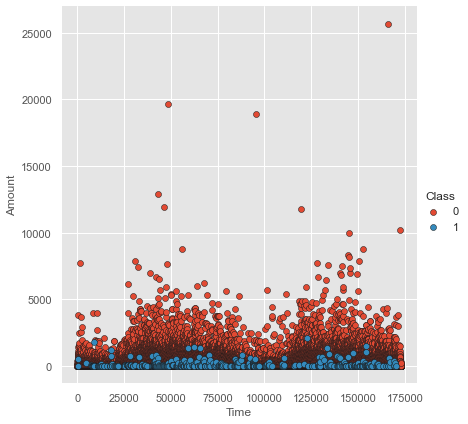

In [135]:
# plot a scatter plot of the target class with Amount and time as Y axis and x axis respectively
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

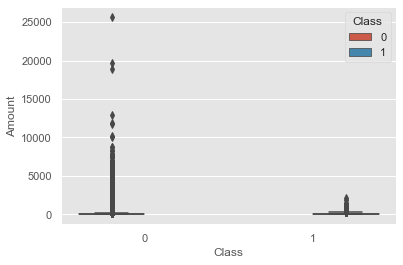

In [136]:
s = sns.boxplot(x="Class", y="Amount", hue="Class",data=data,showfliers=True)
plt.show();

### Observation from the visuals above  
The scatter plot and box plot above clearly shows that all the fraudulent transactions made using credit cards are always lessthan 2500 dollars. This will therefore help better analyse False Positive instances of transactions greater than 2500 dollars

### Feature Correlation Using Heatmap
  
Since the features have been encoded for privacy purposes using PCA (Principal Component Analysis), I will perform feature correlation to see which 
features have a direct and inverse correlation with the target class


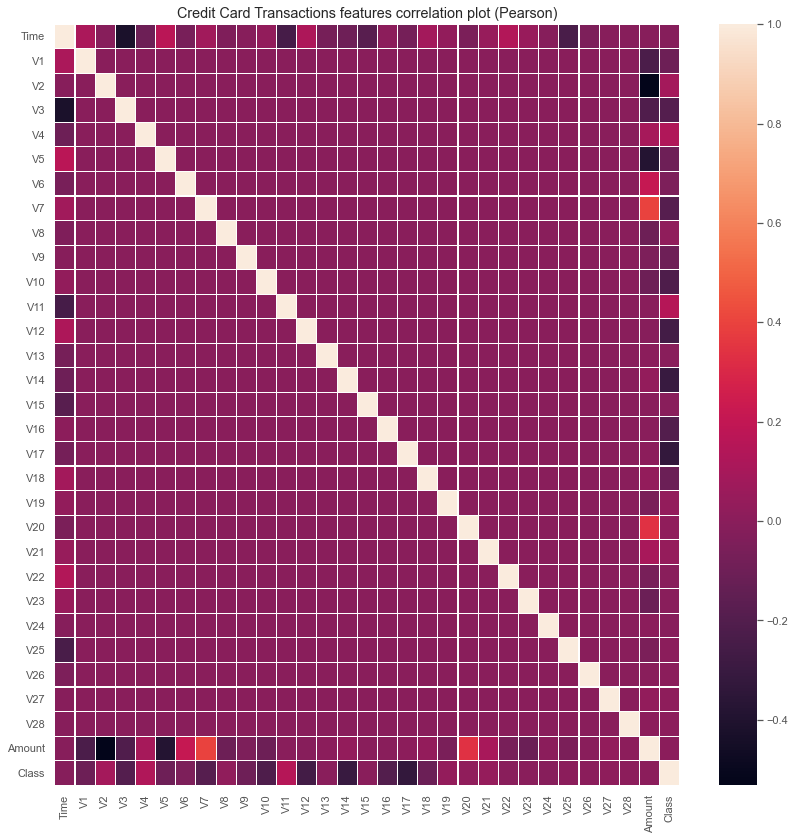

In [137]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1)
plt.show()

### Observations from Feature Correlation 

- V7 and V20 is noticed to have high direct correlation with Amount, which implies an increase in these faetures causes an increase in credit card amount
- V2 and V5 has an inverse correlation with Amount, implies an increase in these features causes a decrease in the credit card amount.
- This therefore means high values of these features will lead to a reduced amounts which is where the fraudulent transactions are targeted.

C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


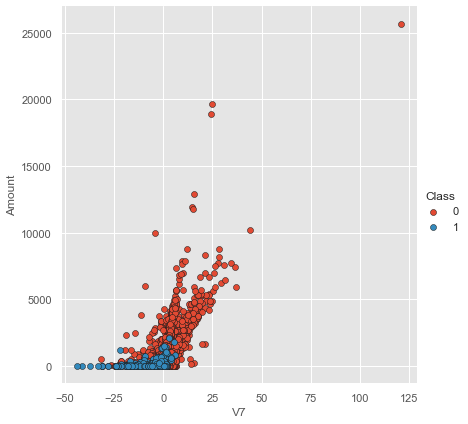

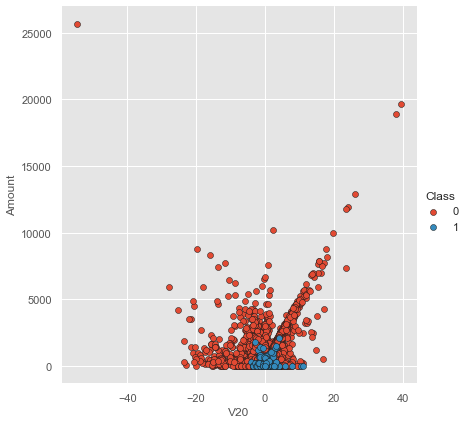

In [138]:
# plot a scatter plot of the target class with Amount and time as Y axis and x axis respectively
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "V7", "Amount", edgecolor="k").add_legend()

sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "V20", "Amount", edgecolor="k").add_legend()
plt.show()

C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cdzek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


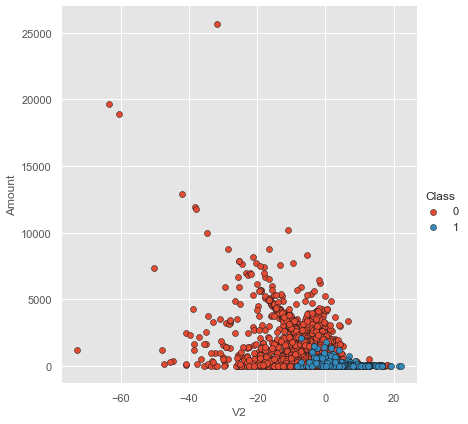

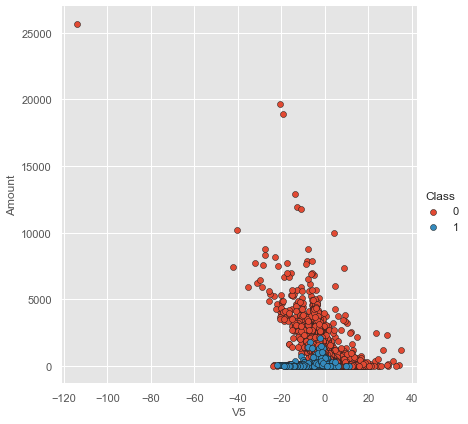

In [139]:
# plot a scatter plot of the target class with Amount and time as Y axis and x axis respectively
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "V2", "Amount", edgecolor="k").add_legend()

sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "V5", "Amount", edgecolor="k").add_legend()
plt.show()

### Building 2 Predictive Models to pick the most optimal
Here I will be building two tree based models after analysing model performance and robustness, the best will be chosen
- Random Forest
- XGBoost

#### Splitting the Data into Train, Validation and Test set  
The dataset is first splitted into train and test with a ratio of 80:20  
Later split train into validation and final train set in to 80:20

In [140]:
X = data.loc[:,data.columns!='Class']
y = data['Class']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)


#### Randon Forest Model

- Random forest classifier is a tree based classifier which uses sub-samples of the dataset where accuracy and overfitting is controlled y averaging the results gotten.

Parameters chosen when training this model on the dataset are:
- n_jobs defines the number of jobs that can run in parallel, values is set to 4
- criterion is the function used to measure the quality of the split, here I'll stick on the default which is gini impurity. 
- n_estimators defines the number of trees in the forest, the default value is maintained
- random_state is used to control the randomness of the samples since bootstrap is true by default, this is used to consider when looking for the best split at each node
- verbose controls the verbosity of the model when fitting and predicting, this is set to False 
- Random forest uses bagging where parallel trees are built and the mean of each tree is taken. Bagging is aimed at reducing variance(overfitting) and if not well implemented will likely have high Bias(model underfitting)

In [143]:
clf = RandomForestClassifier(n_jobs=4, random_state=200, criterion='gini', 
                             n_estimators=100, verbose=False)

In [144]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=200, verbose=False)

In [145]:
y_pred_val = clf.predict(X_val)

In [146]:
roc_auc_score(y_val, y_pred_val)

0.8799670286191585

### Feature Importance  
This is the technique used to calculate the score of all the input features to the model. These score can be used in cases like:
- Model interpretation: Model interpretation makes communication and interpretation of the model easier to other teams and stakeholders.
- Model improvement and performance: Feature importannce can be used to build a more robust model by reducing overfitting and dimensionality. Features noticed to have very low scores and little correlation to the target feature can be dropped as a measure of feature engineering
- With tree based models, when implementing feature importance normalization is not needed since the trees are splitted through information gain using measures like Gini impurity and Entropy

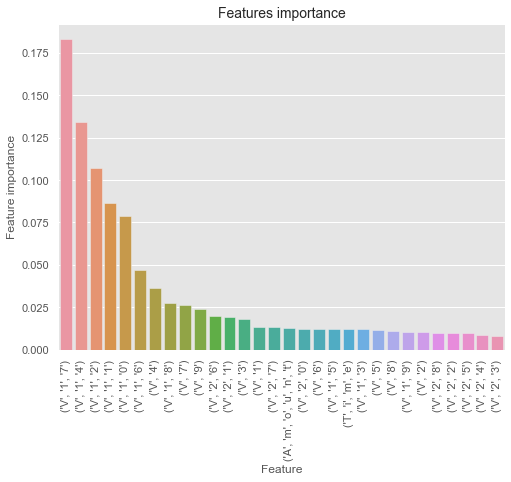

In [147]:
feature_imp = pd.DataFrame({'Feature':X , 'Feature importance': clf.feature_importances_})
feature_imp = feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (8,6))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Confusion Matrix

A confussion matrix is a table used to measure indepth model performance especially when the target class is imbalanced. Also, it represents the number of instances in the actual class and the predicted class.
Confusion matrix contains:
- True Negative (TN) - Actual instances that are NO and predicted as NO
- False Positive (FP) - Actual instances that are NO and predicted YES
- False Negative (FN) - Actual instances that are YES and predicted as NO
- True Positive (TP) - Actual instances that are YES and predicted as YES

- Precision tells how much your classifier predicted correctly  
precision = TP / TP + FP

- Recall shows how often your classifier predicts YES when it is actually YES.  
Recall = TP / TP + FN

- F1-score is the harmonic mean of precision and recall.  
F1-score = 2*Recall * Precision / Recall + Precision

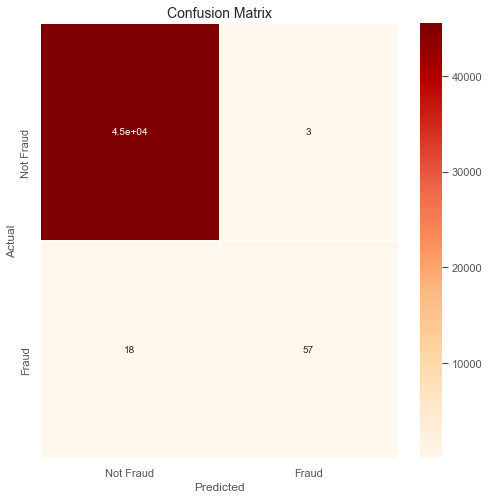

In [149]:
cm = pd.crosstab(y_val, y_pred_val, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(8,8))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2, cmap="OrRd")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [150]:
print("[Validation Classification Report:]")
print(classification_report(y_val, y_pred_val))

[Validation Classification Report:]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45494
           1       0.95      0.76      0.84        75

    accuracy                           1.00     45569
   macro avg       0.97      0.88      0.92     45569
weighted avg       1.00      1.00      1.00     45569



### XGBOOST MODEL

- XGBoost also called Extreme Gradient Boosting is a tree based model that uses Gradient Boosting to improve performance and speed. 
- XGBoost uses Boosting where weak learners(smaller decision trees) are sequencially built each learning from the previous thus boosting the model performance. 
- 

### Setting the parameters and building the model  
- Objective: Defines the output format of the model, logistic regression is chosen here.
- eval_metric: This is the evaluation metric for validation data and it is assigned according to the objective chosen, area under the curve is set here.
- subsample: the value set here is used to randomly sample that ratio from training data prior to growing trees, this also prevents overfitting.
- max_depth: this is used to set the maximum tree depth, having large trees will likely cause overfitting thus it is set to 2

In [151]:
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result


dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_val, y_val)
dtest = xgb.DMatrix(X_test, y_test)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]


params = {}
params['objective'] = 'reg:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['eval_metric'] = 'auc'
params['random_state'] = 200

model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)


C:\Users\cdzek\Anaconda3\lib\site-packages\xgboost\core.py:568: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[16:23:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.85749	valid-auc:0.84655
[50]	train-auc:0.91309	valid-auc:0.92642
[81]	train-auc:0.91754	valid-auc:0.92625


In [152]:
val_pred = model.predict(dvalid)

In [155]:
roc_auc_score(y_val, val_pred )

0.9262460983866005

In [157]:
test_pred = model.predict(dtest)

In [158]:
roc_auc_score(y_test, test_pred)

0.9571853781583031

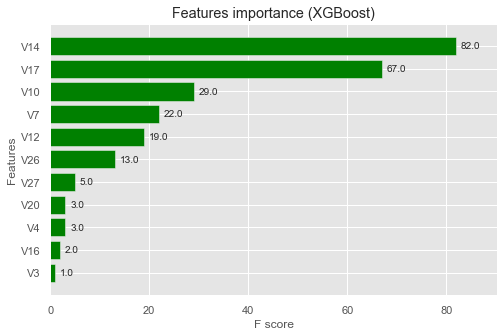

In [159]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

### Conclussion
- Feature correlation is a very important stage during model training as it helps understand what input variables are related to the target and how.
- It's seen from the visual that V2 and V5 have inverse correlation with amount. This implies increase in these features will lead to reduced amounts of the transaction which is a very important feature to monitor as most of the fraudulent transactions are lessthan 2000 dollars.
- From the model performance above, XGBoost has the best model performance and doesn't overfit. 
- Since the data is imbalanced, accuracy score was therefore not he best way to check model accuracy which is why I used area under the ROC (Receiver Operator Characteristics) curve and F1-score from classification report.
- Feature importance also shows that the top features of greatest importance to this model making correct predictions are V14, V17, V10, V7 and V12.